In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as GPoly, Point
import random

In [3]:
file_path = '/content/drive/MyDrive/Research/Forest_Fire/gangwon_fire_predict/re_data/강원특별자치도 산불 현황 데이터_2020.csv'
data = pd.read_csv(file_path)

In [4]:
latitude_col = 'LOC_INFO_Y'
longitude_col = 'LOC_INFO_X'
latitudes = data[latitude_col].dropna().values
longitudes = data[longitude_col].dropna().values

In [5]:
fire_coords = np.array(list(zip(longitudes, latitudes))) # 따로 longitude, latitude column만 뽑아와서 np 배열로 저장.

fire_polygon = GPoly(fire_coords)

In [6]:
# 이 부분, 기존 intel 이랑 다름. shapely 라이브러리로 폴리곤 내부에 점 있는지 판별. 기능은 동일.
## 출력 위도 경도값 세부 조정은 불가능
# def point_in_polygon(point, polygon):
#     return polygon.contains(Point(point))



## intel 은 위의 라이브러리를 다 구현한거.
def point_in_polygon(point, polygon):
    x, y = point
    n = len(polygon)
    inside = False

    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xints = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside

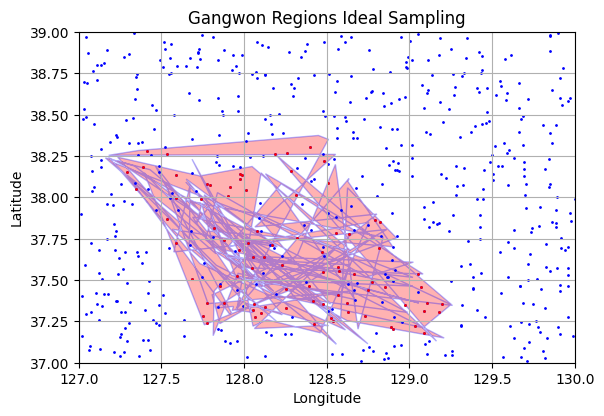

In [10]:
## Ideal Sampling
## ==> 랜덤하게 점 만들어 놓고, 기존 불 데이터 위 경도랑 같음 Fire로, 아니면 NoFIre 로.
## 데이터 불균형.

N_rnd = 600 # 랜덤 점 600개
np.random.seed(42)


polyG = Polygon(fire_coords, closed=True, fc=(1,0,0,0.3), ec=(0,0,1,0.3))

fig, ax = plt.subplots()
ax.add_patch(polyG)

xrnd = (130 - 127) * np.random.sample(N_rnd) + 127 # longitude값 127~130 조정
yrnd = (39 - 37) * np.random.sample(N_rnd) + 37 # latitude값 37~39로 조정.

prnd = np.array(list(zip(xrnd, yrnd)))
plt.scatter(xrnd, yrnd, s=1, c='b') # 이렇게 생성된 점들을 blue 컬러로

# 폴리곤 안에 있는 점들은 red 컬러로
test = [point_in_polygon(point, fire_coords) for point in prnd]
test = np.array(test)
plt.scatter(xrnd[test == True], yrnd[test == True], s=1, c='r')

plt.gca().set_aspect('equal')
plt.xlim(127, 130)
plt.ylim(37, 39)
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Gangwon Regions Ideal Sampling')
plt.show()

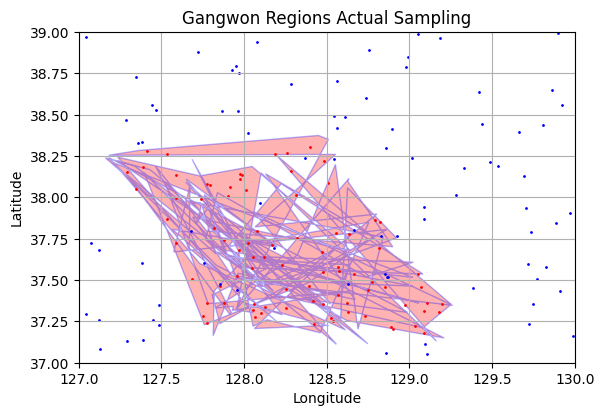

In [11]:
fireP = [coord for coord in prnd if point_in_polygon(coord, fire_coords)]
polyP = Polygon(fire_coords, closed=True, fc=(1,0,0,0.3), ec=(0,0,1,0.3))

fig, ax = plt.subplots()
ax.add_patch(polyP)

NumFireSample = len(fireP) # 개수 맞춰준거. fire랑 nofire 개수 일부로 맞춰줄라고.
plt.scatter(*zip(*fireP), s=1, c='r')

nofire = [coord for coord in prnd if not point_in_polygon(coord, fire_coords)] # polygon 안에 없는거 nofire로.
nofireSample = random.sample(nofire, NumFireSample) # 그걸 개수 맞춰준 거(Nofire)
plt.scatter(*zip(*nofireSample), s=1, c='b')

# Set the aspect ratio and limits
plt.gca().set_aspect('equal')
plt.xlim(127, 130)
plt.ylim(37, 39)
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Gangwon Regions Actual Sampling')
plt.show()